In [1]:
# redunadant to use random if we import numpy, random is a package within
import numpy as np
# import random

In [2]:
# randint(a, b) to get random integer from a range (a,b)
np.random.randint(-90, 90)
# random.randint(-90, 90)

-30

In [3]:
# get a random number between 0 and 1
np.random.random()
# random.random()

0.9699250984028479

In [4]:
# create variable to hold random gcs coordinate (lat, long)
random_gcs = np.random.randint(-90, 90) + np.random.random()
# random_gcs = random.randint(-90, 90) + random.random()
random_gcs

29.136519170217486

In [5]:
# loop through to append a list with coordinates
x = 1
coordinates = []

while x < 11:
    random_gcs = np.random.randint(-90, 90) + np.random.random()
    # random_gcs = random.randint(-90, 90) + random.random()
    coordinates.append(random_gcs)
    x += 1

In [6]:
coordinates

[-83.20224891751893,
 35.037078305506135,
 -16.81150308107557,
 -87.01729801225078,
 -47.99919012834643,
 -36.08743950347521,
 -58.4009036499133,
 -70.03766981601524,
 60.13673742322891,
 13.962867060340368]

In [7]:
# default step value is 1, but a 3 will add the range counted by 3's
import random
random.randrange(-90, 90, step = 3)

-45

In [8]:
random.uniform(-90, 90)

37.63420843773909

In [9]:
np.random.uniform(-90, 90)

58.5896167141388

In [10]:
np.random.uniform(-90.000, 90.000, size = 50)

array([ 63.45839019,  49.29124766, -84.59186536,  45.87809478,
        27.68045105, -25.12984273,  -1.09386715,  87.79137948,
        35.37272407,  40.96596529,  13.07059552, -58.0880977 ,
       -88.84743771,  51.39212913, -68.32627881,  13.39776474,
       -75.1592712 , -30.05231859, -12.36695171, -18.62265369,
        59.37224346,  26.80942672, -26.2465818 ,  67.74940009,
       -12.15265693, -54.15443542,  89.66047963, -84.49749124,
        21.53913838,   2.71229509,  51.59218487,  12.08800232,
        62.64742593,  56.14355179, -31.48458741,  46.584102  ,
       -48.61787474, -81.4215475 ,   0.09239511,  73.66207289,
       -10.32852208, -43.32966197,  51.4735956 , -68.84237954,
        61.0765007 , -52.02688961,  79.23345609, -23.26843409,
       -29.85015695,  15.41412534])

In [11]:
import timeit
%timeit np.random.uniform(-90.000, 90.000, size = 1500)

16.4 µs ± 937 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [12]:
# create a function thata takes in a size to return an array that size with gcs coordinates
def coordinator(amount):
    coordinates = []
    
    coordinates.append(np.random.unifom(-90.000, 90.000, size = amount))
    
    return coordinates

%timeit coordinator

23.7 ns ± 4.98 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# create the coordinates
lats = np.random.uniform(-90.000, 90.000, size = 50)
longs = np.random.uniform(-90.000, 90.000, size = 50)

# zip function allows us to connect these arrays as ordered pairs
gcs_coordinates = zip(lats, longs)

gcs_coordinates

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(gcs_coordinates)

In [16]:
## pip install citipy
from citipy import citipy

In [17]:
# for coordinate in coordinates:
    # print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name, # use citipy to get the city name
    # citipy.nearest_city(coordinate[0], coordinate[1]).country_code) # to get the country code

In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

42

In [19]:
citiz = pd.unique(cities)

len(citiz)

42

In [20]:
import requests
requests.__version__

'2.26.0'

In [21]:
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + "9c52aa93220062a382edb4a8caedfa3a"

In [22]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c52aa93220062a382edb4a8caedfa3a&q=Boston


In [23]:
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [24]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [25]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [26]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"base":"stations","main":{"temp":60.94,"feels_like":58.53,"temp_min":57.83,"temp_max":63.34,"pressure":1013,"humidity":38},"visibility":10000,"wind":{"speed":16.11,"deg":210,"gust":26.46},"clouds":{"all":100},"dt":1650120609,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1650103290,"sunset":1650151567},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [27]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 60.94,
  'feels_like': 58.53,
  'temp_min': 57.83,
  'temp_max': 63.34,
  'pressure': 1013,
  'humidity': 38},
 'visibility': 10000,
 'wind': {'speed': 16.11, 'deg': 210, 'gust': 26.46},
 'clouds': {'all': 100},
 'dt': 1650120609,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1650103290,
  'sunset': 1650151567},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [28]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [29]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [30]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 60.94,
  'feels_like': 58.53,
  'temp_min': 57.83,
  'temp_max': 63.34,
  'pressure': 1013,
  'humidity': 38},
 'visibility': 10000,
 'wind': {'speed': 16.11, 'deg': 210, 'gust': 26.46},
 'clouds': {'all': 100},
 'dt': 1650120609,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1650103290,
  'sunset': 1650151567},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [31]:
# Get the JSON data.
boston_data = city_weather.json()

In [32]:
# Get the JSON data.
boston_data["sys"]

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1650103290,
 'sunset': 1650151567}

In [33]:
boston_data["dt"]

1650120609

In [34]:
boston_data["coord"]["lat"]

42.3584

In [35]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 63.34 38 100 16.11


In [36]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Get the date from the JSON file.
date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 4, 16, 14, 50, 9)

In [37]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-04-16 14:50:09'

In [38]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [39]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------


In [40]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | sao raimundo das mangabeiras
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | tselinnoye
Processing Record 5 of Set 1 | umzimvubu
Processing Record 6 of Set 1 | vazante
Processing Record 7 of Set 1 | saint george
Processing Record 8 of Set 1 | jalu
Processing Record 9 of Set 1 | clyde river
Processing Record 10 of Set 1 | baldeogarh
Processing Record 11 of Set 1 | kuche
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | nuuk
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | tingi
Processing Record 17 of Set 1 | tubruq
Processing Record 18 of Set 1 | opuwo
Processing Record 19 of Set 1 | sovetskiy
Processing Record 20 of Set 1 | margaritesti
Processing Record 21 of Set 1 | tetouan
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | sao borja
Processing Record 24 of Set 1 | taolanaro
Pro

In [41]:
# try:
  # Do something
# except:
  # print("An exception occurred")
    
# Run an API request for each of the cities.
try:
    # Parse the JSON and retrieve data.
    city_weather = requests.get(city_url).json()
    # Parse out the needed data.
    city_lat = city_weather["coord"]["lat"]
    city_lng = city_weather["coord"]["lon"]
    city_max_temp = city_weather["main"]["temp_max"]
    city_humidity = city_weather["main"]["humidity"]
    city_clouds = city_weather["clouds"]["all"]
    city_wind = city_weather["wind"]["speed"]
    city_country = city_weather["sys"]["country"]
    # Convert the date to ISO standard.
    city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    # Append the city information into city_data list.
    city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
except:
    print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

-----------------------------
Data Retrieval Complete      
-----------------------------


In [42]:
city_data

[{'City': 'Goderich',
  'Lat': 43.7501,
  'Lng': -81.7165,
  'Max Temp': 37.72,
  'Humidity': 52,
  'Cloudiness': 0,
  'Wind Speed': 9.22,
  'Country': 'CA',
  'Date': '2022-04-16 14:52:44'}]

In [43]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [44]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Goderich,43.7501,-81.7165,37.72,52,0,9.22,CA,2022-04-16 14:52:44


In [45]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [46]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [48]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.time()
today

1650120764.935162

In [49]:
# Get today's date
today = time.strftime("%x")
today

'04/16/22'

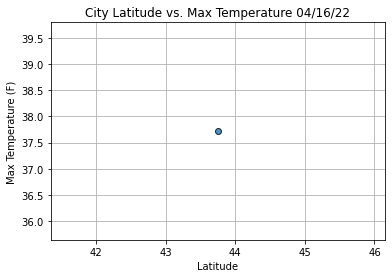

In [50]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

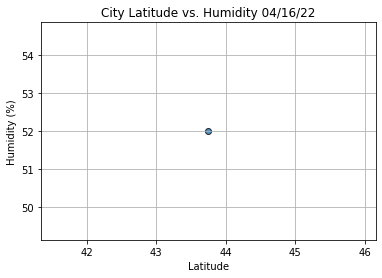

In [51]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

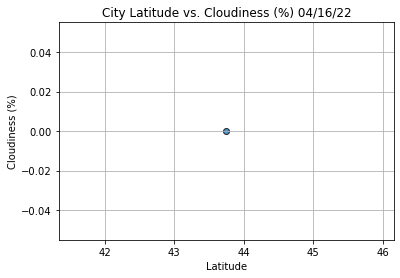

In [52]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

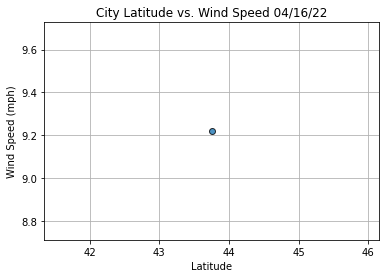

In [53]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()